# TASK 1 
# Problem Statement : To Predict the percentage of marks based on the 

#                                      number of study hours 


#Name : SR.Ahrthi 

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


data = pd.read_csv("score.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# DATA VISUALIZATION 

In [4]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018D0A75F438>,
      dtype=object)

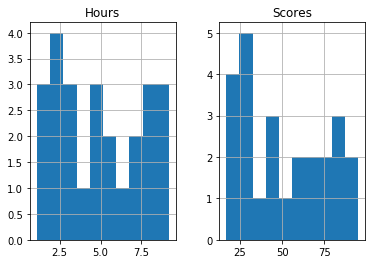

In [19]:
data.hist()

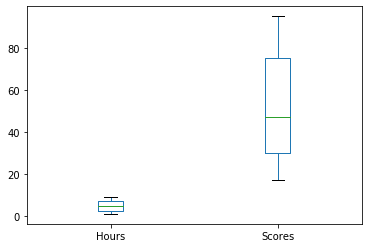

In [20]:
data.plot.box()

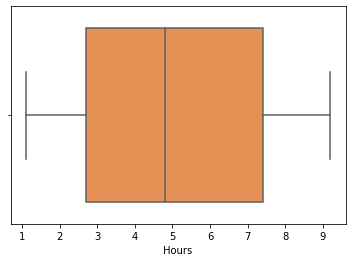

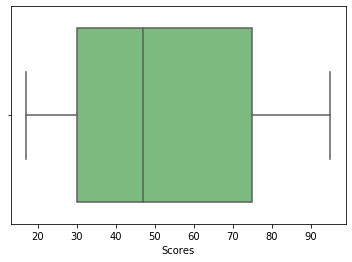

In [37]:
sns.boxplot(data['Hours'],palette = "Oranges")
plt.show()
sns.boxplot(data['Scores'],palette = "Greens")
#plt.show()

#We see that there are no outliers

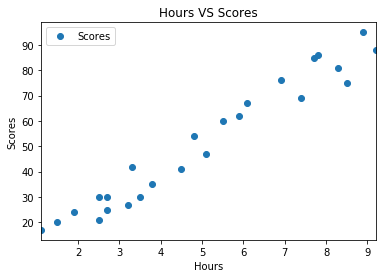

In [6]:
data.plot(x='Hours', y='Scores',style='o')
plt.title("Hours VS Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [5]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

# OBSERVATION 
#Therefore from the graph we observe that the data is linear and thus we use linear regression algorithm to model the data

# Splitting data


In [7]:
#x = data['Hours']  #indepedent variable
#y = data['Scores'] #dependent variable 
x = data.iloc[:, :-1].values #here we split into dependent and independent variable
y = data.iloc[:,1].values

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)#the order of x_train and y_train is important


# MODELING

In [11]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()#creates regression model
reg.fit(x_train,y_train) #fit will train the data in regression model 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
#prediction
y_pred=reg.predict(x_test)

In [13]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)



0.9678055545167994

In [14]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [15]:
hours = np.array([9.25]) 
#np.reshape(hours,(1,-1))
pred = reg.predict(np.array([9.25]).reshape(1, 1))
#pred = reg.predict(hours)
#reg.predict(reg.fit_transform([[9.25]]))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = [9.25]
Predicted Score = 92.38611528261494


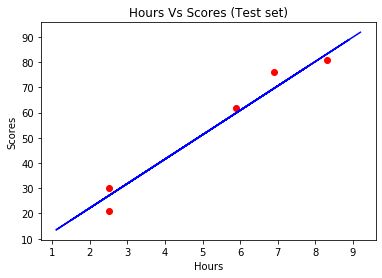

In [16]:
#PLOTTING TESTING DATA
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, reg.predict(x_train), color = 'blue')
plt.title('Hours Vs Scores (Test set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

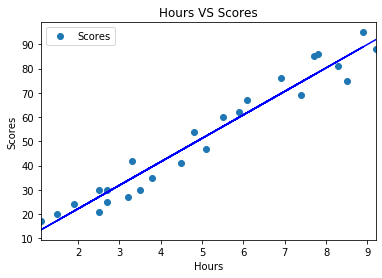

In [17]:
# PLOTTING REGRESSION LINE
data.plot(x='Hours', y='Scores',style='o')
plt.plot(x_train, reg.predict(x_train), color = 'blue')
plt.title("Hours VS Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()
